In [1]:
import imageio
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
letterDict={
  "a": 0,"b": 1,"c": 2,"d": 3,"e": 4,"f": 5,"g": 6,"h": 7,"i": 8,
    "j": 9,"k": 10,"l": 11,"m": 12,"n": 13,"o": 14,"p": 15,"q": 16,"r": 17,
    "s": 18,"t": 19,"u": 20,"v": 21,"w": 22,"x": 23,"y": 24,"z": 25}

numberDict={
    0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I",
    9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R",
    18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"}

def readPictures(df_complete, directory,letter_value):
    im = imageio.imread(directory)
    im.shape
    im=np.reshape(im,400)
    df = pd.DataFrame(data=im).T
    df['Letter'] = letter_value
    
    return df_complete.append(df, ignore_index=True)


In [3]:
import os
all_imgs = pd.DataFrame()

def read_all_images(upper_directory,all_imgs):
    for subdir, dirs, files in os.walk(upper_directory):
        for file in files:
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + file
            if filepath.endswith(".jpg"):
                #print (filepath)
                x = filepath.split("/")
                letter = (x[-1][0])
                letter_val = letterDict.get(letter)

                all_imgs = readPictures(all_imgs,filepath,letter_val)
    return all_imgs

            
alldata = read_all_images("./dataset3",all_imgs)
alldata

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,21,23,8,7,24,21,17,30,21,31,...,86,78,87,68,43,16,16,17,22,17
1,238,255,249,237,247,253,244,243,249,234,...,255,236,218,236,241,255,210,252,237,17
2,231,223,229,236,226,218,223,227,228,227,...,229,230,225,222,219,219,221,223,223,17
3,11,13,8,9,32,0,31,3,13,21,...,12,5,17,1,22,4,5,6,6,17
4,161,166,166,167,165,168,164,159,166,159,...,207,255,239,195,86,47,30,11,3,17
5,253,241,243,222,224,201,206,202,190,198,...,216,210,208,216,225,237,240,244,247,17
6,201,212,199,207,199,198,191,197,189,183,...,227,220,230,235,84,28,28,28,70,17
7,53,34,50,37,58,41,48,49,35,57,...,38,39,47,46,31,35,36,38,39,17
8,255,255,255,248,241,255,252,239,255,253,...,73,83,76,72,85,83,73,76,84,17
9,214,237,237,222,250,212,248,211,228,206,...,225,202,237,222,208,216,224,232,243,17


In [4]:
def get_train_test_set(data):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(26):
        #print(data.loc[data['Letter']==i])
        train, test = train_test_split(data.loc[data['Letter']==i], 
                                       test_size=0.2, shuffle=True)
        
        #print(train)
        train_set = train_set.append([train], ignore_index=True)
        test_set = test_set.append([test], ignore_index=True)
    return train_set, test_set

train_set, test_set = get_train_test_set(alldata)

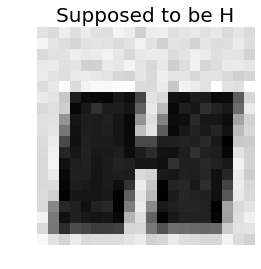

In [5]:
def printLetter(letter):
    numpy_letter = letter[0:-1].values
    plt.imshow(numpy_letter.reshape(20,20), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.title('Supposed to be {}'.format(numberDict.get(letter['Letter'])), fontsize=20)
    plt.show()
    return

a_letter = train_set.iloc[2001]
printLetter(a_letter)


In [6]:
print(pd.__version__)
train_set
test_set

0.24.2


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,245,246,243,239,239,242,239,234,221,253,...,200,222,183,214,215,194,219,204,198,0
1,209,200,218,207,204,215,206,223,221,220,...,224,143,15,15,21,1,104,247,220,0
2,28,18,26,13,31,24,33,26,26,36,...,8,5,30,0,24,20,19,0,34,0
3,228,222,224,214,221,232,223,219,232,228,...,247,229,232,226,218,232,229,230,239,0
4,147,150,157,132,139,155,133,150,145,143,...,185,170,158,180,148,168,167,166,165,0
5,17,43,48,34,40,34,8,31,28,30,...,22,45,44,28,43,45,55,38,32,0
6,239,234,237,239,231,233,241,242,233,227,...,192,191,179,179,191,186,190,194,193,0
7,43,33,23,33,74,134,185,212,201,165,...,36,43,37,30,37,39,32,30,35,0
8,240,225,232,220,221,240,232,225,228,220,...,228,234,229,224,223,229,235,209,230,0
9,223,235,208,216,222,220,242,211,223,221,...,220,225,204,237,201,226,228,231,232,0


In [16]:
test_set.shape[0]/(train_set.shape[0]+test_set.shape[0])

0.2013498312710911